<a href="https://colab.research.google.com/github/ninja03jod/Data_Science_Projects/blob/main/Case_study%26_ML_Car_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/imports-85.data")
df[:2]

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [ ]:
df.columns=['symboling', 'normalized_losses','make','fuel_type','aspiration','numofDoors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight',
'engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# check total records:
print(df.shape[0],"rows")
print(df.shape[1],"columns")

204 rows
26 columns


In [ ]:
# apply describe and analyze
df.describe()
# deafult it gies int values statistical operation

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,204.0,0.823529,1.239035,-2.0,0.000,1.0,2.00,3.0
wheel_base,204.0,98.806373,5.994144,86.6,94.500,97.0,102.40,120.9
length,204.0,174.075000,12.362123,141.1,166.300,173.2,183.20,208.1
width,204.0,65.916667,2.146716,60.3,64.075,65.5,66.90,72.3
height,204.0,53.749020,2.424901,47.8,52.000,54.1,55.50,59.8
curb_weight,204.0,2555.602941,521.960820,1488.0,2145.000,2414.0,2939.25,4066.0
engine_size,204.0,126.892157,41.744569,61.0,97.000,119.5,142.00,326.0
compression_ratio,204.0,10.148137,3.981000,7.0,8.575,9.0,9.40,23.0
city_mpg,204.0,25.240196,6.551513,13.0,19.000,24.0,30.00,49.0
highway_mpg,204.0,30.769608,6.898337,16.0,25.000,30.0,34.50,54.0


In [ ]:
# for object type statistical operation
df.describe(include=object)

,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm,price
count,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,186
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,40,32,184,167,114,96,120,201,148,158,93,23,20,19,37,4


In [ ]:
# if we wants both int values and object categories statstical operation then :
#df.describe(include="all")
df.describe(include="all").T
# we can transpose it also

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,204.0,NaN,NaN,NaN,0.823529,1.239035,-2.0,0.0,1.0,2.0,3.0
normalized_losses,204,52,?,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,204,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,204,2,gas,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,204,2,std,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numofDoors,204,3,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_style,204,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive_wheels,204,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_location,204,2,front,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel_base,204.0,NaN,NaN,NaN,98.806373,5.994144,86.6,94.5,97.0,102.4,120.9


In [ ]:
# fetch last 3 records:
df.tail(3)

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
# select categorical columns
df.select_dtypes(object).columns

Index(['normalized_losses', 'make', 'fuel_type', 'aspiration', 'numofDoors',
       'body_style', 'drive_wheels', 'engine_location', 'engine_type',
       'num_of_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower',
       'peak_rpm', 'price'],
      dtype='object')

In [ ]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
# list out makers of car
# check makerwise count
df[["make"]].value_counts()

make         
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
dtype: int64

In [ ]:
# how many are there with 2 doors
df[df.numofDoors == "two"].shape[0]

88

In [ ]:
df[:5]

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
# display fuel type of each car
df.groupby(["make","fuel_type"]).count()[["numofDoors"]]

,,numofDoors
make,fuel_type,
alfa-romero,gas,2
audi,gas,7
bmw,gas,8
chevrolet,gas,3
dodge,gas,9
honda,gas,13
isuzu,gas,4
jaguar,gas,3
mazda,diesel,2


In [ ]:
# display body style of each car:
df.groupby(["make","body_style"]).count()[["numofDoors"]]

numofDoors
make          body_style             
alfa-romero   convertible           1
              hatchback             1
audi          hatchback             1
              sedan                 5
              wagon                 1
bmw           sedan                 8
chevrolet     hatchback             2
              sedan                 1
dodge         hatchback             5
              sedan                 3
              wagon                 1
honda         hatchback             7
              sedan                 5
              wagon                 1
isuzu         hatchback             1
              sedan                 3
jaguar        sedan                 3
mazda         hatchback            10
              sedan                 7
mercedes-benz convertible           1
              hardtop               2
              sedan                 4
              wagon                 1
mercury       hatchback             1
mitsubishi    hatchback             9
              sedan                 4
nissan        hardtop               1
              hatchback             5
              sedan                 9
              wagon                 3
peugot        sedan                 7
              wagon                 4
plymouth      hatchback             4
              sedan                 2
              wagon                 1
porsche       convertible           1
              hardtop               2
              hatchback             2
renault       hatchback             1
              wagon                 1
saab          hatchback             3
              sedan                 3
subaru        hatchback             3
              sedan                 5
              wagon                 4
toyota        convertible           1
              hardtop               3
              hatchback            14
              sedan                10
              wagon                 4
volkswagen    convertible           1
              hatchback             1
              sedan                 9
              wagon                 1
volvo         sedan                 8
              wagon                 3

In [ ]:
df[:5]

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
# show the record of mpfi engine only:
df.query("fuel_system == 'mpfi'")

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485


In [ ]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'numofDoors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [ ]:
df[["num_of_cylinders","fuel_system"]]

,num_of_cylinders,fuel_system
0,four,mpfi
1,six,mpfi
2,four,mpfi
3,five,mpfi
4,five,mpfi
...,...,...
199,four,mpfi
200,four,mpfi
201,six,mpfi
202,six,idi


In [ ]:
# how many number of cylinder for each car:
df.groupby("make")[["num_of_cylinders"]].value_counts()

make           num_of_cylinders
alfa-romero    four                 1
               six                  1
audi           five                 6
               four                 1
bmw            six                  6
               four                 2
chevrolet      four                 2
               three                1
dodge          four                 9
honda          four                13
isuzu          four                 4
jaguar         six                  2
               twelve               1
mazda          four                13
               two                  4
mercedes-benz  eight                4
               five                 4
mercury        four                 1
mitsubishi     four                13
nissan         four                12
               six                  6
peugot         four                11
plymouth       four                 7
porsche        six                  3
               four                 1
               eig

In [ ]:
df[:5]

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
# sort the cars on basis of drive_wheels:
df.groupby("make")[["drive_wheels"]].value_counts()

make           drive_wheels
alfa-romero    rwd              2
audi           fwd              5
               4wd              2
bmw            rwd              8
chevrolet      fwd              3
dodge          fwd              9
honda          fwd             13
isuzu          rwd              2
               fwd              2
jaguar         rwd              3
mazda          fwd             11
               rwd              6
mercedes-benz  rwd              8
mercury        rwd              1
mitsubishi     fwd             13
nissan         fwd             15
               rwd              3
peugot         rwd             11
plymouth       fwd              6
               rwd              1
porsche        rwd              5
renault        fwd              2
saab           fwd              6
subaru         fwd              7
               4wd              5
toyota         fwd             16
               rwd             14
               4wd              2
volkswagen     fwd  

In [ ]:
df[["make"]].value_counts()

make         
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
dtype: int64

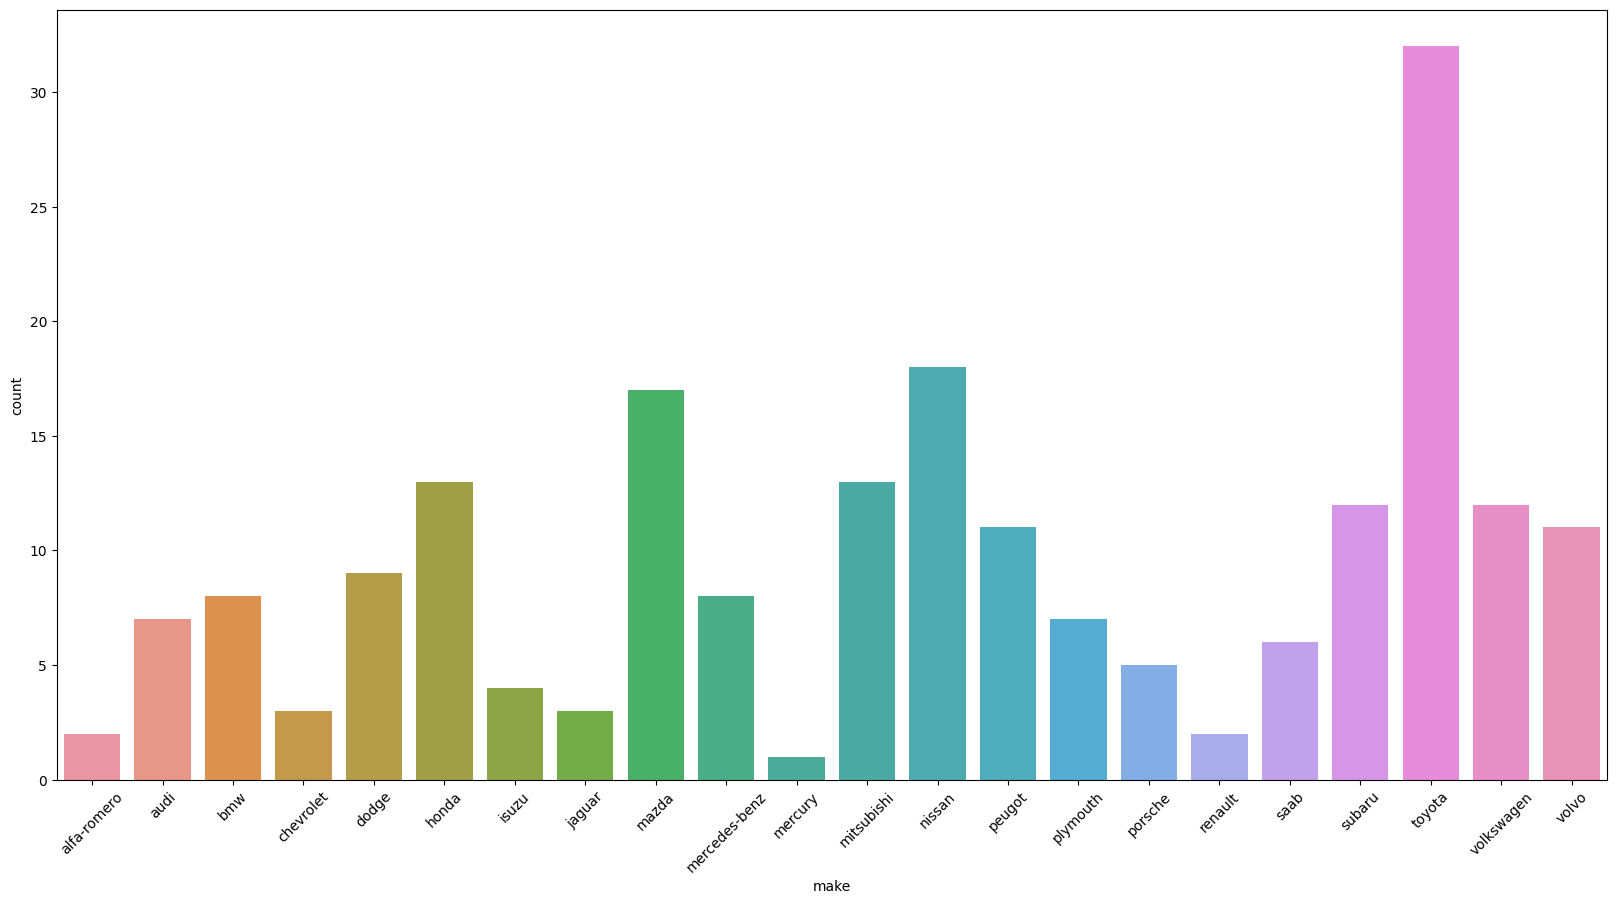

In [ ]:
# plot the bar plot for each car
plt.figure(figsize=(20,10))
sns.countplot(x="make",data=df)
plt.xticks(rotation=45);

In [ ]:
df[:5]

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


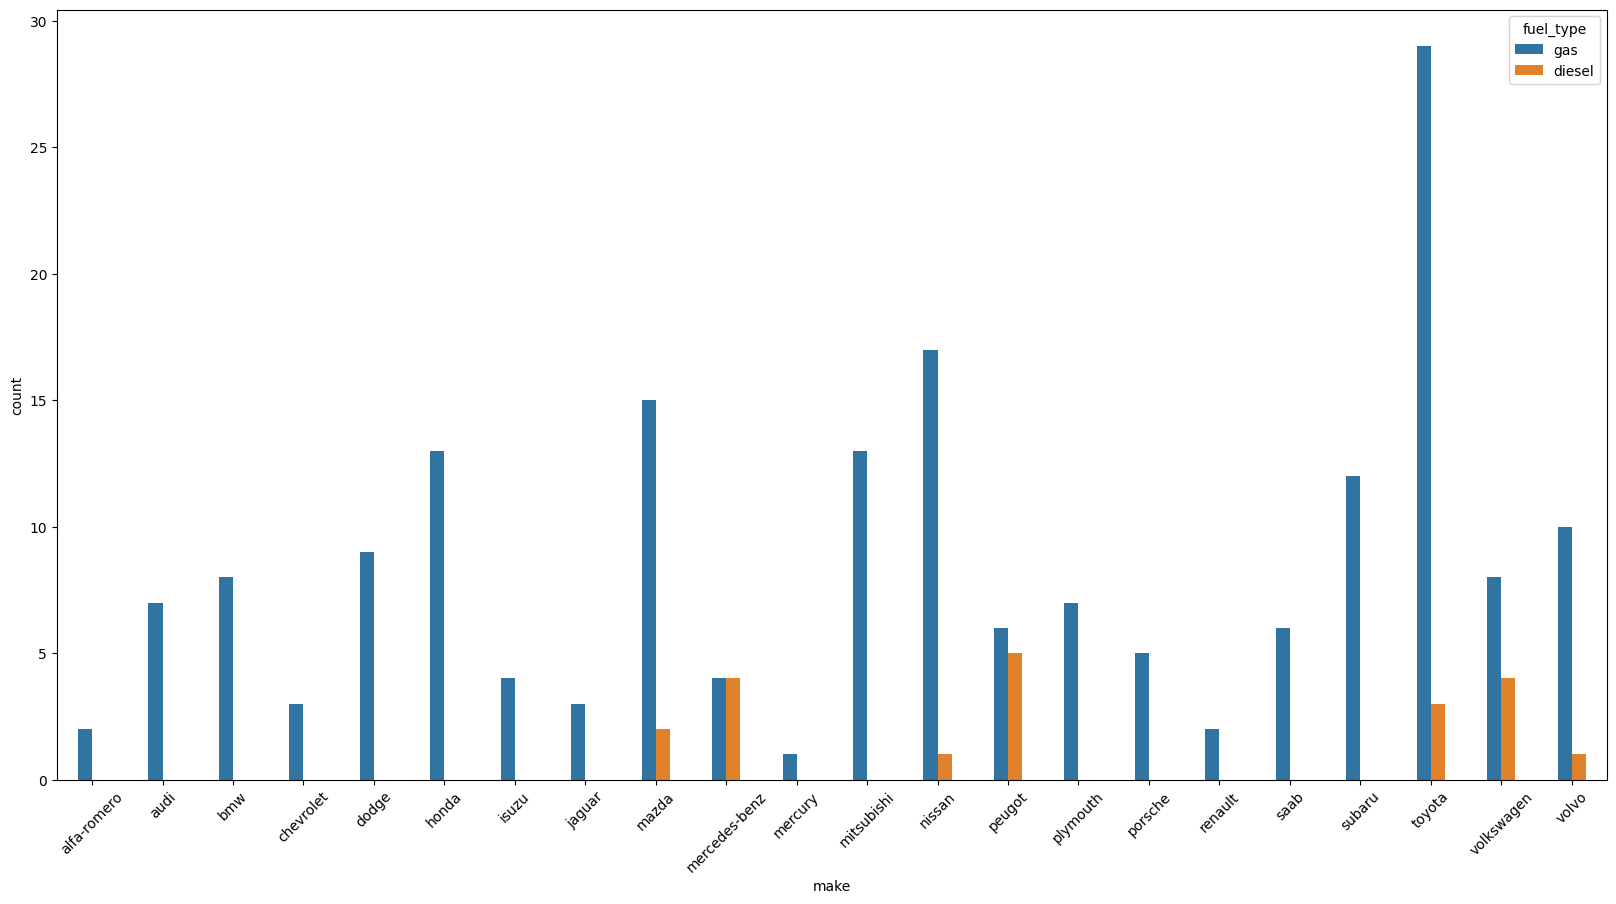

In [ ]:
# plot the bar plot for each car with their fuel_type
plt.figure(figsize=(20,10))
sns.countplot(x="make",data=df,hue="fuel_type",width=.4)
plt.xticks(rotation=45);

In [ ]:
df[:5]

,symboling,normalized_losses,make,fuel_type,aspiration,numofDoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Lets predict Total losses due car crashes

In [ ]:
# lets create model which detects the price of car:
model = LinearRegression()
model

LinearRegression()

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
X = sns.load_dataset("car_crashes")
X

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [ ]:
x = X.iloc[:,1:7]
x

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,7.332,5.640,18.048,15.040,784.55,145.08
1,7.421,4.525,16.290,17.014,1053.48,133.93
2,6.510,5.208,15.624,17.856,899.47,110.35
3,4.032,5.824,21.056,21.280,827.34,142.39
4,4.200,3.360,10.920,10.680,878.41,165.63
5,5.032,3.808,10.744,12.920,835.50,139.91
6,4.968,3.888,9.396,8.856,1068.73,167.02
7,6.156,4.860,14.094,16.038,1137.87,151.48
8,2.006,1.593,5.900,5.900,1273.89,136.05
9,3.759,5.191,16.468,16.826,1160.13,144.18


In [ ]:
# check nan available or not:
x.isna().sum()

speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
dtype: int64

In [ ]:
# output:
y = X["total"]
y

0     18.8
1     18.1
2     18.6
3     22.4
4     12.0
5     13.6
6     10.8
7     16.2
8      5.9
9     17.9
10    15.6
11    17.5
12    15.3
13    12.8
14    14.5
15    15.7
16    17.8
17    21.4
18    20.5
19    15.1
20    12.5
21     8.2
22    14.1
23     9.6
24    17.6
25    16.1
26    21.4
27    14.9
28    14.7
29    11.6
30    11.2
31    18.4
32    12.3
33    16.8
34    23.9
35    14.1
36    19.9
37    12.8
38    18.2
39    11.1
40    23.9
41    19.4
42    19.5
43    19.4
44    11.3
45    13.6
46    12.7
47    10.6
48    23.8
49    13.8
50    17.4
Name: total, dtype: float64

In [ ]:
X.tail()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


In [ ]:
# lets feed or provide training to model:
model.fit(x,y)

LinearRegression()

In [ ]:
model.predict([[4.52,3.49,8.69,9.11,890.03,111.62]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.62375003])